In [372]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab

In [159]:
def get_test_train_split(data, split_ratio=0.9):
    train_size = int(split_ratio*len(data))
    train = data[:train_size]
    test  = data[train_size:]
    return train, test

In [386]:
class EWMA:
    def __init__(self, alpha):
        self.alpha = alpha

    def fit(self,train):
        y_t_hat = data[0]
        for t in range(len(train)):
            y_t = data[t]
            y_t_hat = self.alpha*y_t + (1-self.alpha)*y_t_hat
            print("Train Prediction: ", y_t_hat, y_t)
        self.y_t_hat = y_t_hat

    def predict(self,test):
        y_t_hat = self.y_t_hat
        mse_errors = np.zeros(len(test))
        mape_errors = np.zeros(len(test))
        for t in range(len(test)):
            y_t = test[t]
            residual = y_t_hat - y_t
            print("Test Prediction: ", y_t_hat, y_t)
            mape_errors[t] = (abs(residual)/y_t)*100
            mse_errors[t] = residual**2
            y_t_hat = self.alpha*y_t + (1-self.alpha)* y_t_hat

        print("MAPE:" + "{:5.2f}".format(np.mean(mape_errors)))
        print("MSE:" + "{:5.2f}".format(np.mean(mse_errors)))        

In [387]:
# Reference for validation: https://medium.com/@abhinav.mahapatra10/beginners-ml-basics-exponentially-weighted-moving-average-8ce3e75768f6 
# EWMA
data= np.array([25, 28, 26, 22, 19, 23, 27])
train, test = get_test_train_split(data, split_ratio=0.6)
ewma = EWMA(0.1)
ewma.fit(train)
ewma.predict(test)

Train Prediction:  25.0 25
Train Prediction:  25.3 28
Train Prediction:  25.37 26
Train Prediction:  25.033 22
Test Prediction:  25.033 19
Test Prediction:  24.4297 23
Test Prediction:  24.286730000000002 27
MAPE:16.01
MSE:15.27


In [281]:
# Parameters
#  ----------
#  x : 1D array
#  y : 1D array the same length as x
def person_correlation_coefficient(x, y):
    covariance_matrix = np.cov(x,y)
    return covariance_matrix[0][1]/np.sqrt((covariance_matrix[0][0]*covariance_matrix[1][1]))

person_correlation_coefficient(np.array([-2.1, -1,  4.3]), np.array([3,  1.1,  0.12]))

-0.8553578095227946

In [292]:
class LinearRegression: #OLS
    def __init__(self):
        self.beta = []
    
    def fit(self, X, Y):
        if (len(X.shape)==1):
            X = np.reshape(X, (-1,1))
#         print(X)
        X = np.concatenate((X,np.ones(shape=X.shape[0]).reshape(-1,1)), 1)
        self.beta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
        print(self.beta)
        return self.beta
            
    def predict(self, data):
        prediction = self.beta[0]
        beta_values = self.beta[1:]
        for i in range(len(data)):
            prediction += data[i]*beta_values[i]
        return prediction

In [294]:
# LINEAR REGRESSION
# input train data of the form:
# [ [X0_0 X0_1 X0_2], 
#   [X1_0 X1_1 X1_2], 
#   [X2_0 X2_1 X2_2]]
# test: [Y0, Y1, Y2] 
# all numpy arrays
LR = LinearRegression()
LR.fit(np.array([[0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10]]).T, np.array([5,6,7,8,9,10,11,12,13,14]))
LR.predict(np.array([0,1]))

[-32.   6.   6.]


-26.0

Test prediction: 27.72 Actual: 25 Error: 10.90
Test prediction: 20.13 Actual: 50 Error: 59.73
Test prediction: 28.65 Actual: 56 Error: 48.84
Test prediction: 44.58 Actual: 45 Error:  0.93


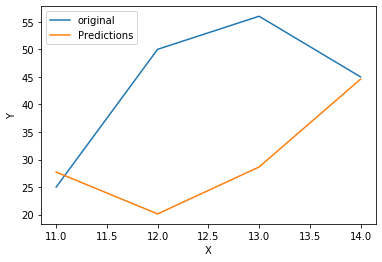

In [389]:
def plot(plot_x, test, predictions):
    plt.plot(plot_x,test,label="original")
    plt.plot(plot_x,predictions,label="Predictions")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper left')   
    plt.show()
    
class AutoRegression:
    def __init__(self, p):
        self.p = p
        self.LR = LinearRegression()
    
    def fit(self, train):
        self.data = train
        return
    
    def train_lr(self,p,curr_len):
        X = []
        Y = []
        for i in range(curr_len):
            if(i+p < curr_len):
                X.append([1])
                X[i] = X[i]+list(self.data[i:i+p])
                Y.append(self.data[i+p])
            else:
                break
        beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))
        return beta
        
    def predict(self, test):
        self.data = np.hstack([self.data, test])
        p = self.p
        t = self.data.shape[0] - test.shape[0] #test data length
        error = np.zeros(test.shape[0])
        predictions = np.zeros(test.shape[0])
        for i in range(t,t+test.shape[0]):
            testx = [1]
            testx = np.hstack([[1], self.data[i-p:i]])
            beta = self.train_lr(p,i)
            predictions[i-t] = np.matmul(testx,beta)
            error[i-t] = (abs(predictions[i-t]-self.data[i])/self.data[i])*100
            print("Test prediction: " + "{:5.2f}".format(predictions[i-t]) + " Actual: " + str(test[i-t]) + " Error: " + "{:5.2f}".format(error[i-t]))

#         plot_data(r,s,y,test,"AR("+str(p)+")")
        self.predictions = predictions
        return predictions, np.mean(error)
    

data= np.array([25, 28, 26, 22, 19, 23, 27, 34, 25, 32,23, 25,50,56,45])
train, test = get_test_train_split(data, split_ratio=0.75)
ar = AutoRegression(3)
ar.fit(train)
predictions, error = ar.predict(test)
plot(np.arange(len(train), len(data)), test, predictions)